# HW05: Practice with algorithm selection, assessment, hyperparameter tuning, multiclass and one-class classification, and imbalanced data.

Leo XIONG tlxiong

##### Hello Students:
 Start by downloading HW05.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in HW05.ipynb and HW05.html to Canvas's HW05 assignment

  As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import mixture

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 1. Algorithm selection for multiclass classification by optical recognition of handwritten digits

The [digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset
  has 1797 labeled images of hand-written digits.
  - $X$ = `digits.data` has shape (1797, 64).
    - Each image $\mathbf{x}_i$ is represented as the $i$th row of 64 pixel values in the 2D
      `digits.data` array that corresponds to an 8x8 photo of a handwritten digit.
  - $y$ = `digits.target` has shape (1797,). Each $y_i$ is a number from 0 to 9 indicating
    the handwritten digit that was photographed and stored in $\mathbf{x}_i$.



### 1(a) Load the digits dataset and split it into training, validation, and test sets as I did in the lecture example code [07ensemble.html](https://pages.stat.wisc.edu/~jgillett/451/burkov/07/07ensemble.html).
This step does not need to display any output.

In [6]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

#--------------------from lecture------------------------
# split 80% training data, 20% "_tmp" for validation & test
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=.2,
                                                  random_state=0, stratify=y)
# of remaining 20%, split in half to get 10% validation, 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0, stratify=y_tmp)
#--------------------from lecture------------------------


## 1(b) Use algorithm selection on training and validation data to choose a best classifier.
Loop through these four classifiers and corresponding parameters, doing a grid search
to find the best hyperparameter setting. Use only the training data for the grid search.
- SVM:
  - Try all values of `kernel` in 'linear', 'rbf'.
  - Try all values of `C` in 0.01, 1, 100.
- logistic regression:
  - Use `max_iter=5000` to avoid a nonconvergence warning.
  - Try all values of `C` in 0.01, 1, 100.
- ID3 decision tree:
  - Use `criterion='entropy` to get our ID3 tree.
  - Try all values of `max_depth` in 1, 3, 5, 7.
- kNN:
  - (Use the default Euclidean distance).
  - Try all values of `n_neighbors` in 1, 2, 3, 4.

Hint:
- Make a list of the four classifiers without setting any hyperparameters.
- Make a list of four corresponding parameter dictionaries.
- Loop through 0, 1, 2, 3:
  - Run grid search on the $i$th classifier with the $i$th parameter dictionary on the
    training data. (The grid search does its own cross-validation using the training data.)
  - Use the $i$th classifier with its best hyperparameter settings (just `clf` from
    `clf = GridSearchCV(...)`) to find the accuracy of the model on the validation data, i.e.
    find `clf.score(X_valid, y_valid)`.
- Keep track, as your loop progresses, of:
  - the index $i$ of the best classifier (initialize it to `-1` or some other value)
  - the best accuracy score on validation data (initialize it to `-np.Inf`)
  - the best classifier with its hyperparameter settings, that is the best `clf` from
    `clf = GridSearchCV(...)` (initialize it to `None` or some other value)

I needed about 30 lines of code to do this. It took a minute to run.

In [8]:
# SVM
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 1, 100]
}
svm = SVC()
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
print("Best parameters for SVC:", grid_search_svm.best_params_)
print("Best accuracy for SVC:", grid_search_svm.best_score_)
print(" ")

# Linear Regression
param_grid = {
    'C': [0.01, 1, 100]
}
lr = LogisticRegression(max_iter=5000)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best parameters for LR:", grid_search_lr.best_params_)
print("Best accuracy: for LR", grid_search_lr.best_score_)
print(" ")

#Decision Tree
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [1, 3, 5, 7]
}
tree = DecisionTreeClassifier(random_state=0)
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)
print("Best parameters for DecisionTree:", grid_search_tree.best_params_)
print("Best accuracy: for DecisionTree", grid_search_tree.best_score_)
print(" ")

#k Nearest Neighbors
param_grid = {
    'metric': ['euclidean'],
    'n_neighbors': [1, 2, 3, 4]
}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print("Best parameters for kNN:", grid_search_knn.best_params_)
print("Best accuracy: for kNN", grid_search_knn.best_score_)

Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Best accuracy for SVC: 0.9881654084397986
 
Best parameters for LR: {'C': 0.01}
Best accuracy: for LR 0.969374274099884
 
Best parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': 7}
Best accuracy: for DecisionTree 0.8538303329461865
 
Best parameters for kNN: {'metric': 'euclidean', 'n_neighbors': 3}
Best accuracy: for kNN 0.9867716802168023


### 1(c) Use the test data to evaluate your already-fit best classifier and its hyperparameter settings from 1(b).
- Well, there are two tied for 'best'. Please use the first of these two.
- Report the result of calling `.score(X_test, y_test)` on your best classifier/hyperparameters.
- Show a confusion matrix from the true `y_test` values and the corresponding $\hat{y}$ values
  predicted by your best classifier/hyperparameters on `X_test`.
- For each of the wrong predictions (where `y_test` and your $\hat{y}$ values disagree), show:
  - The index $i$ in the test data of that example $\mathbf{x}$
  - The correct label $y_i$
  - Your incorrect prediction $\hat{y}_i$
  - A plot of that image (to see whether the confusion was reasonable)

Best Classifier: SVC(C=1)
Best Score: 0.9881654084397986
Test Score: 0.9777777777777777
 
Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  1  0  0]
 [ 0  0  0  0 17  0  0  0  1  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0]
 [ 0  1  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  1  0  0  0 17]]
 
Number 61, correct: 9, predicted: 5
Number 65, correct: 4, predicted: 8
Number 152, correct: 8, predicted: 1
Number 177, correct: 3, predicted: 7


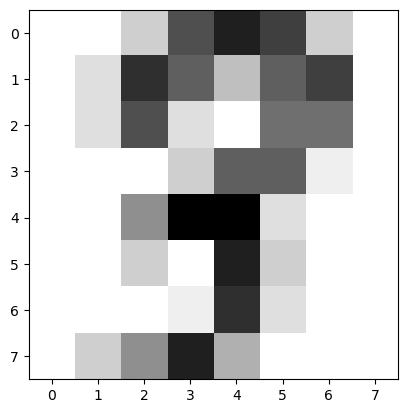

In [10]:
results = [
    (grid_search_svm.best_estimator_, grid_search_svm.best_score_),
    (grid_search_lr.best_estimator_, grid_search_lr.best_score_),
    (grid_search_tree.best_estimator_, grid_search_tree.best_score_),
    (grid_search_knn.best_estimator_, grid_search_knn.best_score_)
]

best_classifier, best_score = max(results, key = lambda x:x[1])
test_score = best_classifier.score(X_test, y_test)
print(f"Best Classifier: {best_classifier}")
print(f"Best Score: {best_score}")
print(f"Test Score: {test_score}")
print(" ")

ypred = best_classifier.predict(X_test)
cm = confusion_matrix(y_test, ypred)
print(f"Confusion Matrix:\n {cm}")
print(" ")

wrong_prediction = np.where(y_test != ypred)[0]
for i in wrong_prediction:
    correct = y_test[i]
    incorrect = ypred[i]
    print(f"Number {i}, correct: {correct}, predicted: {incorrect}")
    plt.imshow(X_test[i].reshape(8, 8), cmap='binary')

## 2. One-class classification (outlier detection)

### 2(a) There is an old gradebook at [http://pages.stat.wisc.edu/~jgillett/451/data/midtermGrades.txt](http://pages.stat.wisc.edu/~jgillett/451/data/midtermGrades.txt).
Use `pd.read_table()` to read it into a DataFrame.

Hint: `pd.read_table()` has many parameters. Check its documentation to find three parameters to:
- Read from the given URL
- Use the separator '\s+', which means 'one or more whitespace characters'
- Skip the first 12 rows, as they are a note to students and not part of the gradebook

In [13]:
gradebook = pd.read_table("https://pages.stat.wisc.edu/~jgillett/451/data/midtermGrades.txt", sep = r'\s+', skiprows = 12)
gradebook.head(5)

,Exam1,Exam2,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,HW6,HW7,HW8,HW9,Percentage,Rank,Percentile,percentageGrade,percentileGrade,Grade
0,121,120,4,4.0,4.0,4.0,4.0,4,4.0,4.0,...,4.0,3.5,3.0,4.0,97.13,391,99.7,A,A,A
1,119,116,4,4.0,4.0,4.0,4.0,4,4.0,4.0,...,4.0,3.5,4.0,3.5,95.22,390,99.5,A,A,A
2,125,109,4,4.0,4.0,4.0,4.0,4,4.0,4.0,...,3.0,4.0,4.0,2.5,94.90,389,99.2,A,A,A
3,117,115,4,4.0,4.0,4.0,4.0,4,4.0,4.0,...,4.0,4.0,3.5,4.0,94.27,387,98.7,A,A,A
4,110,122,4,4.0,4.0,4.0,4.0,4,4.0,4.0,...,4.0,4.0,4.0,4.0,94.27,387,98.7,A,A,A


### 2(b) Use `clf = mixture.GaussianMixture(n_components=1)` to make a one-class Gaussian model to decide which $\mathbf{x}=(\text{Exam1}, \text{Exam2})$ are outliers:

- Set a matrix X to the first two columns, Exam1 and Exam.
- These exams were worth 125 points each. Transform scores to percentages in $[0, 100]$.

  Hint: I tried the MinMaxScaler() first, but it does the wrong thing if there aren't scores
  of 0 and 125 in each column. So, instead, I just multiplied the whole matrix by 100 / 125.
- Fit your classifier to X.
  
  Hint:
  - The reference page for `mixture.GaussianMixture` includes a `fit(X, y=None)` method
    with the comment that y is ignored (as this is an unsupervised learning algorithm--there
    is no $y$) but present for API consistency. So we can fit with just X.
  - I got a warning about "KMeans ... memory leak". You may ignore this
    warning if you see it. I still got satisfactory results.
- Print the center $\mathbf{\mu}$ and covariance matrix $\mathbf{\Sigma}$ from the two-variable
  $N_2(\mathbf{\mu}, \mathbf{\Sigma})$ distribution you estimated.

In [15]:
clf = mixture.GaussianMixture(n_components=1)
X = gradebook[['Exam1', 'Exam2']]
transform = 100/125
X_percentage = X * transform

clf.fit(X_percentage)

mu = clf.means_[0]
sigma = clf.covariances_[0]

print(f"Center mu: {mu}")
print(f"Covariance Matrix: {sigma}")

Center mu: [82.81329923 71.01176471]
Covariance Matrix: [[155.51123078  73.02961336]
 [ 73.02961336 180.87014392]]


C:\Users\leoxi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### 2(c) Here I have given you code to make a contour plot of the negative log likelihood $-\ln f_{\mathbf{\mu}, \mathbf{\Sigma}}(\mathbf{x})$ for $\mathbf{X} \sim N_2(\mathbf{\mu}, \mathbf{\Sigma})$, provided you have set `clf`.

```
# make contour plot of log-likelihood of samples from clf.score_samples()
margin = 10
x = np.linspace(0 - margin, 100 + margin)
y = np.linspace(0 - margin, 100 + margin)
grid_x, grid_y = np.meshgrid(x, y)
two_column_grid_x_grid_y = np.array([grid_x.ravel(), grid_y.ravel()]).T
negative_log_pdf_values = -clf.score_samples(two_column_grid_x_grid_y)
grid_z = negative_log_pdf_values
grid_z = grid_z.reshape(grid_x.shape)
plt.contour(grid_x, grid_y, grid_z, levels=10) # X, Y, Z
plt.title('(Exam1, Exam2) pairs')
```

Paste my code into your code cell below and add more code:
- Add black $x$- and $y$- axes. Label them Exam1 and Exam2.
- Plot the data points in blue.
- Plot $\mathbf{\mu}=$ `clf.means_` as a big lime dot.
- Overplot (i.e. plot again) in red the 8 outliers determined by a threshold consisting
  of the 0.02 quantile of the pdf values $f_{\mathbf{\mu}, \mathbf{\Sigma}}(\mathbf{x})$
  for each $\mathbf{x}$ in X.
  
  Hint: `clf.score_samples(X)` gives log likelihood, so `np.exp(clf.score_samples(X))`
  gives the required $f_{\mathbf{\mu}, \mathbf{\Sigma}}(\mathbf{x})$ values.

C:\Users\leoxi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


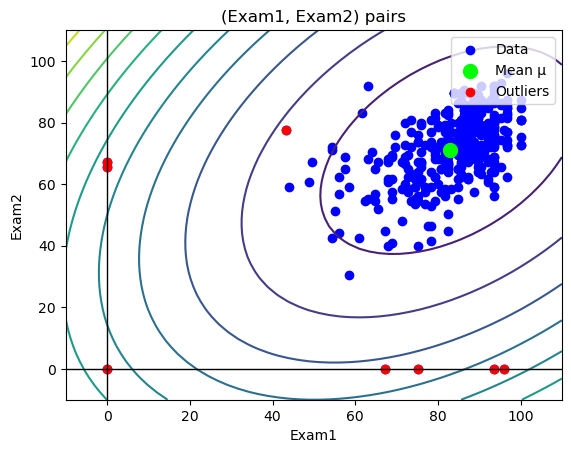

In [17]:
# make contour plot of log-likelihood of samples from clf.score_samples()
margin = 10
x = np.linspace(0 - margin, 100 + margin)
y = np.linspace(0 - margin, 100 + margin)
grid_x, grid_y = np.meshgrid(x, y)
two_column_grid_x_grid_y = np.array([grid_x.ravel(), grid_y.ravel()]).T
negative_log_pdf_values = -clf.score_samples(two_column_grid_x_grid_y)
grid_z = negative_log_pdf_values
grid_z = grid_z.reshape(grid_x.shape)
plt.contour(grid_x, grid_y, grid_z, levels=10) # X, Y, Z
plt.title('(Exam1, Exam2) pairs')

#adding black x and y axis and labelling them
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlabel("Exam1")
plt.ylabel("Exam2")

# Plotting data points in blue
plt.scatter(X_percentage['Exam1'], X_percentage['Exam2'], color='blue', label='Data')

# Plotting mu as a big lime dot
plt.scatter(mu[0], mu[1], color='lime', s=100, label='Mean μ')

#Overplotting in red the 8 outliers determined by a threshold consisting of the 0.02 quantile of the pdf values for each x in X
pdf_values = np.exp(clf.score_samples(X_percentage))
threshold = np.quantile(pdf_values, 0.02)
outliers = pdf_values < threshold
plt.scatter(X_percentage[outliers]['Exam1'], X_percentage[outliers]['Exam2'],
            color='red', label='Outliers')
plt.legend(loc='upper right', frameon=True)

### What characterizes 7 of these 8 outliers? Write your answer in a markdown cell.

Looking at this graph I made (If I did it correctly), 7 of the 8 outliers sit on the X and Y axis I created, meaning 4 students have low scores on the 2nd exams and 2 of the students have low scores on the first exam. There is 1 student who did bad on both.

### 2(d) Write a little code to report whether, by the 0.02 quantile criterion, $\mathbf{x}=$ (Exam1=50, Exam2=100) is an outlier.

Hint: Compare $f_{\mathbf{\mu}, \mathbf{\Sigma}}(\mathbf{x})$ to your threshold

In [21]:
exams = np.array([[50, 100]]) * transform
pdf_exams = np.exp(clf.score_samples(exams))[0]
is_outlier = pdf_exams < threshold

print(f"PDF value at (50, 100): {pdf_exams:.5f}")
print(f"Threshold: {threshold:.5f}")
print(f"Is x an outlier? {'Yes' if is_outlier else 'No'}")

PDF value at (50, 100): 0.00000
Threshold: 0.00001
Is x an outlier? Yes


C:\Users\leoxi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


## 3. Explore the fact that accuracy can be misleading for imbalanced data.
Here I make a fake imbalanced data set by randomly sampling $y$ from a distribution with $P(y = 0) = 0.980$ and $P(y = 1) = 0.020$.

In [23]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.98, 0.02],
                           n_clusters_per_class=1, flip_y=0.01, random_state=0)
print(f'np.bincount(y)={np.bincount(y)}; we expect about 980 zeros and 20 ones.')
print(f'np.mean(y)={np.mean(y)}; we expect the proportion of ones to be about 0.020.')

np.bincount(y)=[9752  248]; we expect about 980 zeros and 20 ones.
np.mean(y)=0.0248; we expect the proportion of ones to be about 0.020.


Here I split the data into 50% training and 50% testing data.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0, stratify=y)
print(f'np.bincount(y_train)={np.bincount(y_train)}')
print(f'np.mean(y_train)={np.mean(y_train)}.')
print(f'np.bincount(y_test)={np.bincount(y_test)}.')
print(f'np.mean(y_test)={np.mean(y_test)}.')

np.bincount(y_train)=[4876  124]
np.mean(y_train)=0.0248.
np.bincount(y_test)=[4876  124].
np.mean(y_test)=0.0248.


### 3a. Train and assess a gradient boosting model.
- Train on the training data.
- Use 100 trees of maximum depth 1 and learning rate $\alpha = 0.25$.
- Use `random_state=0` (to give us all a chance of getting the same results).
- Display the accuracy, precision, recall, and AUC on the test data. Use 3 decimal places.
  Use a labeled print statement with 3 decimal places so the reader can easily find each metric.
- Make an ROC curve from your classifier and the test data.

Accuracy: 0.982
Precision: 0.846
Recall: 0.355
AUC: 0.783


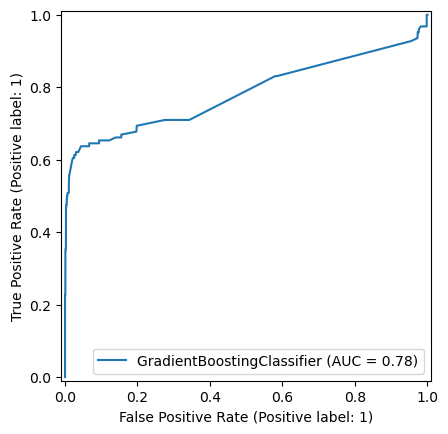

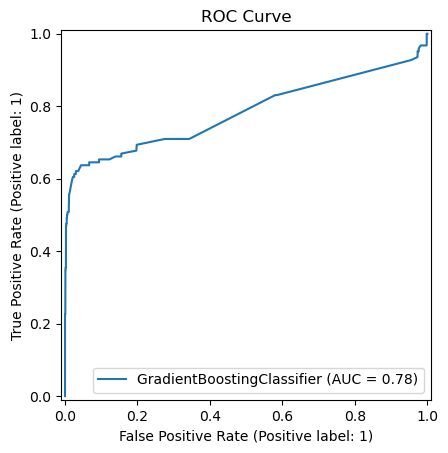

In [27]:
clf = GradientBoostingClassifier(n_estimators=100, random_state = 0, learning_rate = 0.25, max_depth = 1)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred)
recall = recall_score(y_test, ypred)

y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of the positive class
AUC = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nAUC: {AUC:.3f}')

roc_display = RocCurveDisplay.from_estimator(clf, X_test, y_test, response_method='predict_proba')



roc_display.plot()
plt.title('ROC Curve')
plt.show()

Note the high accuracy but lousy precision, recall, and AUC.

Note that since the data have about 98% $y = 0$, we could get about 98% accuracy
by just always predicting $\hat{y} = 0$. High accuracy alone is not necessarily helpful.

### 3b. Now oversample the data to get a balanced data set.
- Use the `RandomOverSampler(random_state=0)` to oversample only the training data
  and get a balanced training data set.
- Repeat your train/assess block from above. (You should find improved recall thanks to
  more of the $y = 1$ cases being classified correctly, along with improved AUC; at the
  cost of decreased accuracy and precision.)


In [30]:
oversampler = RandomOverSampler(random_state=0)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

clf = GradientBoostingClassifier(n_estimators=100, random_state = 0, learning_rate = 0.25, max_depth = 1)
clf.fit(X_resampled, y_resampled)
ypred = clf.predict(X_test)

accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred)
recall = recall_score(y_test, ypred)

y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of the positive class
AUC = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nAUC: {AUC:.3f}')

Accuracy: 0.942
Precision: 0.248
Recall: 0.653
AUC: 0.848


Note that we traded a little accuracy for much improved precision, recall, and AUC.

If you do classification in your project and report accuracy, please
also report the proportions of $y = 0$ and $y = 1$ in your test data so that
we get insight into whether your model improves upon always guessing $\hat{y} = 0$
or always guessing $\hat{y} = 1$.